In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
red_image=cv2.imread('MainBefore.webp')
red=red_image[:,:,2]


plt.imshow(red)


TypeError: 'NoneType' object is not subscriptable

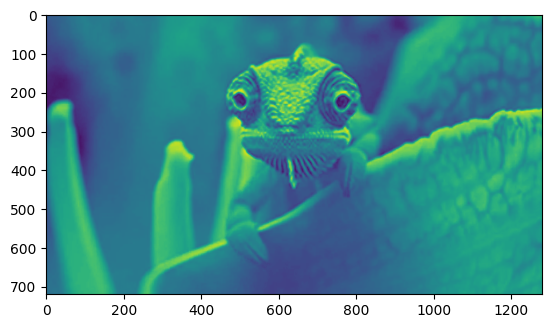

In [ ]:
green=red_image[:,:,1]
plt.imshow(green)

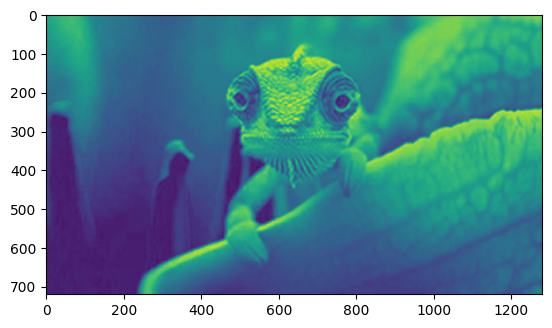

In [ ]:
blue=red_image[:,:,0]
plt.imshow(blue)

In [ ]:
#for RED MATRIX
M,N=red.shape
print(M,N)

720 1280


In [ ]:
lowquality=0.001*red

In [ ]:
SR=np.zeros((M,N),dtype=np.float64)
print(SR)
threshold=np.sum(lowquality)/(M*N)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
sigma=0.5
losses=[]#to store the mean square difference

for _ in range(10):
    noisy=sigma*np.random.randn(M,N)+lowquality
    #modified image
    modified=np.where(noisy>threshold,255,0)

    mse=np.mean((modified-red)**2)#mean square error between the modified and the reference image
    losses.append(mse)
    SR+=modified
SR/=10



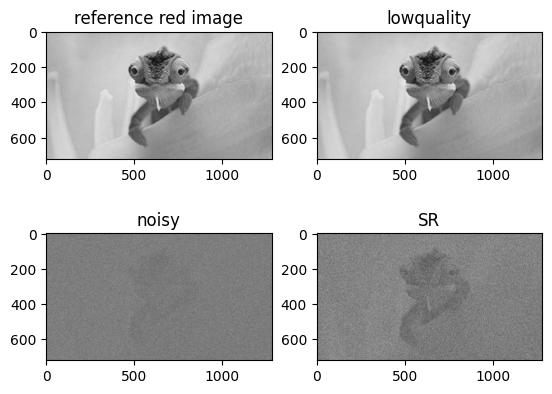

In [ ]:
plt.subplot(2,2,1)
plt.title('reference red image')
plt.imshow(red,cmap='gray')

plt.subplot(2,2,2)
plt.title('lowquality')
plt.imshow(lowquality,cmap='gray')


plt.subplot(2,2,3)
plt.title('noisy')
plt.imshow(noisy,cmap='gray')

plt.subplot(2,2,4)
plt.title('SR')
plt.imshow(SR,cmap='gray')

In [ ]:
#for green image
M,N=green.shape
print(M,N)

720 1280


In [ ]:
lowquality=0.001*green
SR2=np.zeros((M,N),dtype=np.float64)
print(SR2)
threshold=np.sum(lowquality)/(M*N)
sigma=0.5
losses=[]#to store the mean square difference

for _ in range(10):
    noisy=sigma*np.random.randn(M,N)+lowquality
    #modified image
    modified=np.where(noisy>threshold,255,0)

    mse=np.mean((modified-green)**2)#mean square error between the modified and the reference image
    losses.append(mse)
    SR2+=modified
SR2/=10

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


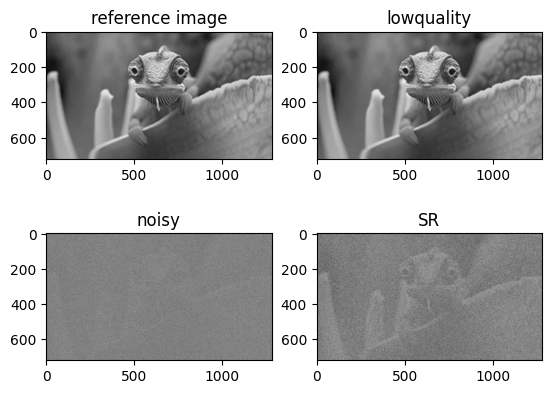

In [ ]:
plt.subplot(2,2,1)
plt.title('reference image')
plt.imshow(green,cmap='gray')

plt.subplot(2,2,2)
plt.title('lowquality')
plt.imshow(lowquality,cmap='gray')


plt.subplot(2,2,3)
plt.title('noisy')
plt.imshow(noisy,cmap='gray')

plt.subplot(2,2,4)
plt.title('SR')
plt.imshow(SR2,cmap='gray')

In [ ]:
#for blue images

M,N=blue.shape
print(M,N)

lowquality=0.01*blue


SR3=np.zeros((M,N),dtype=np.float64)
print(SR3)
threshold=np.sum(lowquality)/(M*N)

sigma=0.5
losses=[]#to store the mean square difference

for _ in range(10):
    noisy=sigma*np.random.randn(M,N)+lowquality
    #modified image
    modified=np.where(noisy>threshold,255,0)
    SR3+=modified
    mse=np.mean((modified-blue)**2)#mean square error between the modified and the reference image
    losses.append(mse)

SR3/=10

720 1280
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


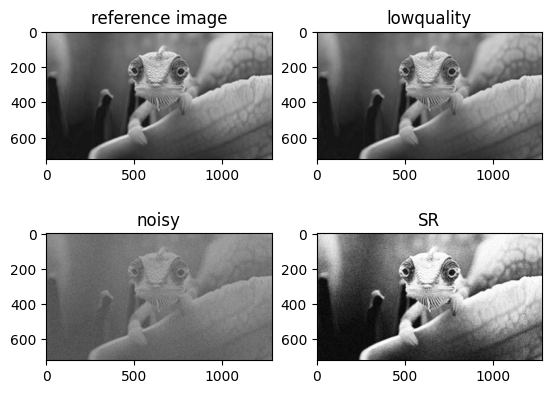

In [ ]:
plt.subplot(2,2,1)
plt.title('reference image')
plt.imshow(blue,cmap='gray')

plt.subplot(2,2,2)
plt.title('lowquality')
plt.imshow(lowquality,cmap='gray')


plt.subplot(2,2,3)
plt.title('noisy')
plt.imshow(noisy,cmap='gray')

plt.subplot(2,2,4)
plt.title('SR')
plt.imshow(SR3,cmap='gray')

In [ ]:
#from numpy import asarray
import numpy
numpydata=np.array(SR)
print(numpydata)

numpydata2=np.array(SR2)

numpydata3=np.array(SR3)

final_matrix=np.add(numpydata,numpydata2,numpydata3)
print(final_matrix)
img = numpy.zeros([720, 1280,3])
img[:,:,0] = final_matrix*64/255.0 #blue
img[:,:,1] = final_matrix*128/255.0 #green
img[:,:,2] = final_matrix*192/255.0 #red

cv2.imwrite('srgeneratedimage.jpg', img)
cv2.imshow("image", img)

[[178.5 127.5 153.  ... 127.5  51.  178.5]
 [127.5 127.5 153.  ... 102.  127.5 102. ]
 [102.  153.  153.  ... 127.5 127.5  51. ]
 ...
 [178.5 127.5 178.5 ... 153.  127.5 178.5]
 [102.  102.  127.5 ... 153.  153.  102. ]
 [127.5 102.  127.5 ... 178.5 127.5 204. ]]
[[255.  229.5 229.5 ... 178.5 255.  255. ]
 [306.  255.  306.  ... 255.  255.  229.5]
 [229.5 357.  280.5 ... 306.  331.5 204. ]
 ...
 [229.5 255.  229.5 ... 306.  306.  382.5]
 [280.5 229.5 306.  ... 280.5 306.  255. ]
 [331.5 229.5 306.  ... 331.5 255.  331.5]]
